<a href="https://colab.research.google.com/github/parthm144/Stock/blob/main/Stock_Price_Prediction_using_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [23]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [24]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [25]:
data = load_data('TCS.NS')
df=data

[*********************100%***********************]  1 of 1 completed


In [26]:
# Check if 'Adj Close' column exists before attempting to drop it
if 'Adj Close' in df.columns:
    df = df.drop(['Date', 'Adj Close'], axis=1)
else:
    # Handle the case where 'Adj Close' is not present (e.g., it might be 'AdjClose')
    # You could print a warning or try to drop a different column
    print("Warning: 'Adj Close' column not found. Dropping only 'Date'.")
    df = df.drop(['Date'], axis=1)

df.head()  # Display the DataFrame after modifications

<ipython-input-26-0702c58a5ad3>:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,280.419342,283.124112,279.449342,281.594504,1963682
1,280.493988,283.366645,278.516712,281.669173,2014488
2,274.151611,280.624416,273.461438,280.493827,3349176
3,266.522430,275.849223,265.253978,274.394234,6474892
4,261.075562,268.052007,259.844430,267.119327,6048178


In [27]:
# Instead of trying to drop the columns again, you can simply check
# if they still exist and only drop them if they do:

columns_to_drop = ['Date', 'Adj Close']
for column in columns_to_drop:
    if column in df.columns:
        df = df.drop(column, axis=1)
    else:
        print(f"Column '{column}' not found in DataFrame. Skipping.")

df.head()

Column 'Date' not found in DataFrame. Skipping.
Column 'Adj Close' not found in DataFrame. Skipping.


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,280.419342,283.124112,279.449342,281.594504,1963682
1,280.493988,283.366645,278.516712,281.669173,2014488
2,274.151611,280.624416,273.461438,280.493827,3349176
3,266.522430,275.849223,265.253978,274.394234,6474892
4,261.075562,268.052007,259.844430,267.119327,6048178


Visualizing Closing Price

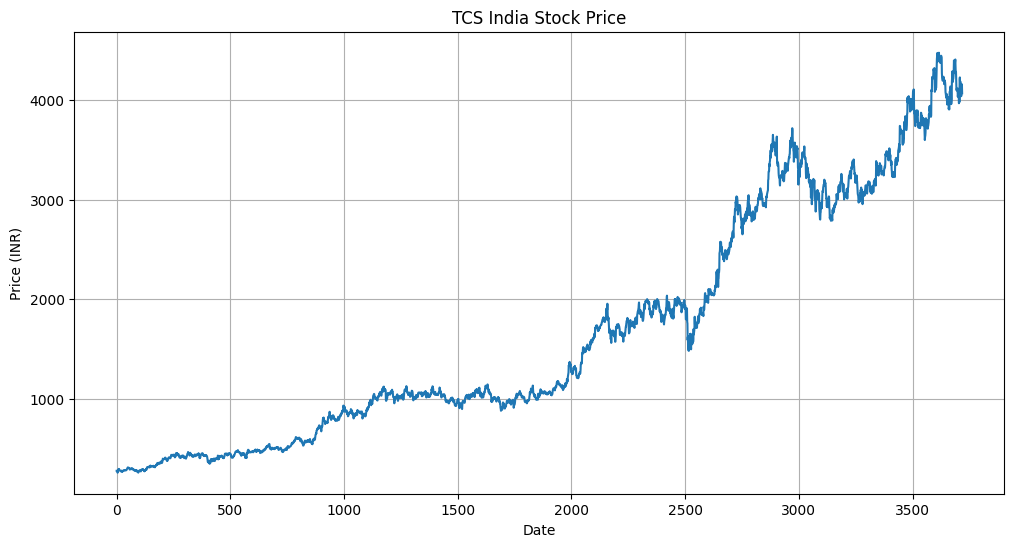

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [29]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,280.419342,283.124112,279.449342,281.594504,1963682
1,280.493988,283.366645,278.516712,281.669173,2014488
2,274.151611,280.624416,273.461438,280.493827,3349176
3,266.522430,275.849223,265.253978,274.394234,6474892
4,261.075562,268.052007,259.844430,267.119327,6048178
...,...,...,...,...,...
3714,4035.850098,4111.000000,4030.000000,4095.300049,1971591
3715,4156.600098,4163.149902,4044.199951,4050.000000,2409223
3716,4145.450195,4191.350098,4140.049805,4168.000000,1822998


# Plotting moving averages of 100 day

---



In [30]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3714,4174.127332
3715,4171.391350
3716,4168.131951
3717,4165.262639


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

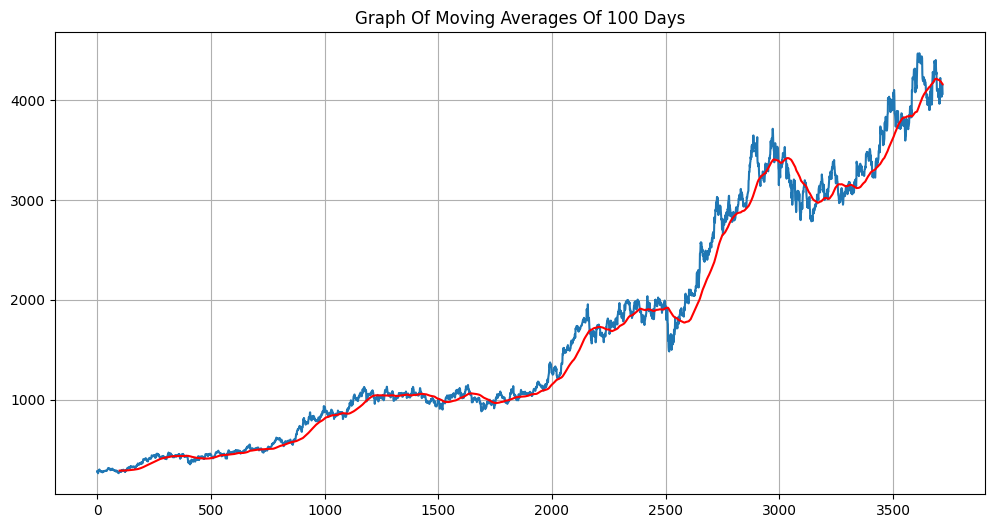

In [31]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [32]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3714,4055.953892
3715,4057.850560
3716,4059.382689
3717,4060.676998


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

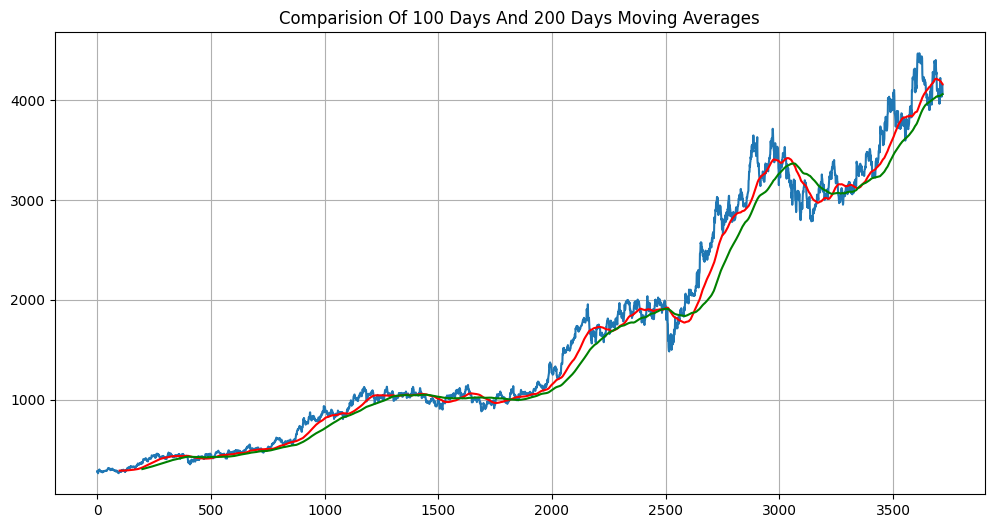

In [33]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [34]:
df.shape

(3719, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [35]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2603, 6)
(1116, 6)


In [36]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,280.419342,283.124112,279.449342,281.594504,1963682
1,2010-01-05,280.493988,283.366645,278.516712,281.669173,2014488
2,2010-01-06,274.151611,280.624416,273.461438,280.493827,3349176
3,2010-01-07,266.522430,275.849223,265.253978,274.394234,6474892
4,2010-01-08,261.075562,268.052007,259.844430,267.119327,6048178


In [37]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2603,2020-07-28,2102.728027,2112.059324,2016.470432,2016.470432,8092319
2604,2020-07-29,2072.048584,2132.087467,2044.737472,2086.568947,6090431
2605,2020-07-30,2075.189453,2146.653534,2068.589267,2081.015735,7098496
2606,2020-07-31,2076.918945,2125.532858,2055.115619,2096.719502,4723290
2607,2020-08-03,2052.111816,2097.357413,2030.763670,2085.158314,4012337


# Using MinMax scaler for normalization of the dataset

---



In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [39]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [40]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01050662],
       [0.01054801],
       [0.00989643],
       ...,
       [0.96015061],
       [0.94175437],
       [0.94705396]])

In [41]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [42]:
x_train.shape

(2503, 100, 1)

# ML Model (LSTM)

---



In [43]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [44]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [46]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - loss: 0.0691 - mean_absolute_error: 0.1809
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0081 - mean_absolute_error: 0.0628
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0076 - mean_absolute_error: 0.0590
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0078 - mean_absolute_error: 0.0602
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0066 - mean_absolute_error: 0.0561
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0073 - mean_absolute_error: 0.0576
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0048 - mean_absolute_error: 0.0479
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0055 - mean_absolute_error: 0.0486
Epoch 9/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0049 - mean_absolute_error: 0.0460
Epoch 10/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0045 - mean_absolute_error: 0.0449
Epoch 11/100
79/79 ━━━━━━━━

In [47]:
model.save('keras_model.h5')

In [48]:
test_close.shape

(1116, 1)

In [49]:
past_100_days = pd.DataFrame(train_close[-100:])

In [50]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [51]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [52]:
final_df.head()

,0
0,1859.341653
1,1829.671254
2,1816.185087
3,1848.552301
4,1875.256129


In [53]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.14502306],
       [0.13539189],
       [0.1310142 ],
       ...,
       [0.89442611],
       [0.87365136],
       [0.87300215]])

In [54]:
input_data.shape

(1216, 1)

# Testing the model

---



In [55]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [56]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1116, 100, 1)
(1116,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [57]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step


In [58]:
y_pred.shape

(1116, 1)

In [59]:
y_test

array([0.19602791, 0.21878227, 0.21697967, ..., 0.89442611, 0.87365136,
       0.87300215])

In [60]:
y_pred

array([[0.2702161 ],
       [0.27132067],
       [0.27220577],
       ...,
       [0.8707434 ],
       [0.86376786],
       [0.8600157 ]], dtype=float32)

In [61]:
scaler.scale_

array([0.00032461])

In [62]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

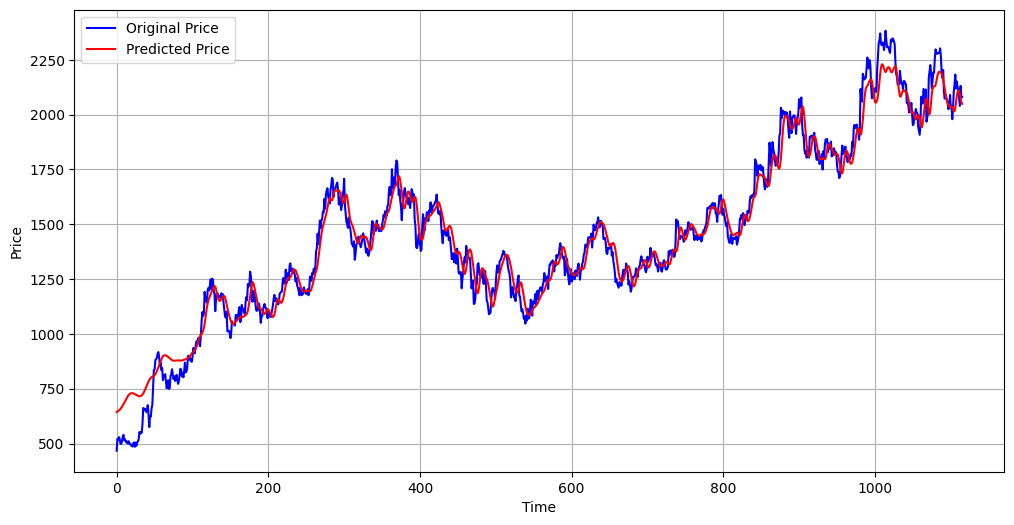

In [63]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [64]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 3.73%


Calculation of R2 score

In [65]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9686003088295162


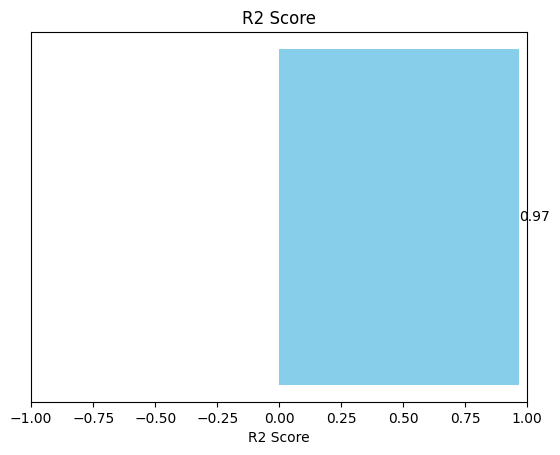

In [66]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

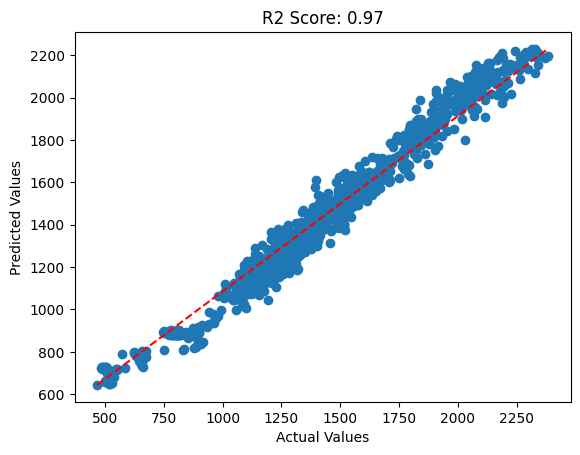

In [67]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()